## About the project

## How do musicians choose the chords they use in their songs? Do guitarists, pianists, and singers gravitate towards different kinds of harmony?

* The objective is to uncover trends in the kinds of chord progressions used by popular artists.The dataset includes professionally tagged chords for several hundred pop/rock songs representative of singles that made the Billboard Hot 100 list between 1958 and 1991.



* Using the data-wrangling tools available in the dplyr package, and the visualization tools available in the ggplot2 package, we can explore the most common chords and chord progressions in these songs, and contrast the harmonies of some guitar-led and piano-led artists to see where the "affordances" of those instruments may affect the chord choices artists make.

In [1]:
# Loading the libraries 
library(dplyr)
library(ggplot2)
library(readr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'readr' was built under R version 3.6.3"

In [4]:
# Reading the data 
bb_chords <- read_csv('C:/Users/Atolb/Downloads/bb_chords.csv')
# glimpse about the data 
head(bb_chords,3)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  year = col_double(),
  chord = col_character(),
  root_integer = col_character(),
  root_roman = col_character(),
  quality = col_character(),
  title_compressed = col_character(),
  artist_compressed = col_character(),
  title = col_character(),
  artist = col_character()
)



year,chord,root_integer,root_roman,quality,title_compressed,artist_compressed,title,artist
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown


####  A key element of the style of any popular musical artist is the kind of chords they use in their songs. But not all chords are created equal! In addition to differences in how they sound, some chords are simply easier to play than others. On top of that, some chords are easier to play on one instrument than they are on another. 
let's look at the most common chords 

In [6]:
bb_count <- bb_chords %>%
count(chord , sort = TRUE)

# displaying the 20 first rows 
bb_count[1:20,]

chord,n
C:maj,1183
G:maj,1140
A:maj,1071
D:maj,1054
F:maj,859
E:maj,839
Bb:maj,718
B:maj,503
Ab:maj,375
Eb:maj,360


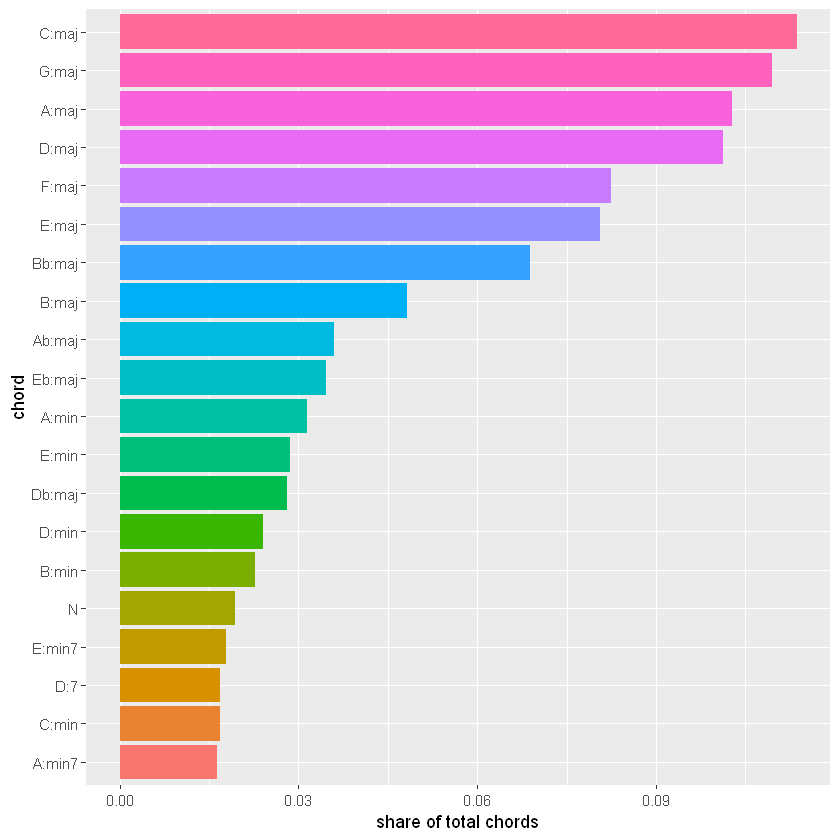

In [35]:
bb_count %>% 
slice(1:20) %>% 
mutate(share = n/sum(n),chord=reorder(chord,share)) %>%
ggplot(aes(chord,share,fill=chord)) + 
geom_col() + 
coord_flip() + 
ylab('share of total chords') + 
xlab('chord') + 
theme(legend.position="none")

#### Chord Bigrams 
Just as some chords are more common and more idiomatic than others, not all chord progressions are created equal. To look for common patterns in the structuring of chord progressions, we can use many of the same modes of analysis used in text-mining to analyze phrases. A chord change is simply a bigram — a two-"word" phrase — composed of a starting chord and a following chord.

* Use mutate() to add two new columns to bb: next_chord and next_title. These should contain the data from the chord and title columns, but shifted one row up. Use the lead() function inside your mutate() command to do this.

* Create a bigram column that concatenates chord with next_chord, with a space in between.

* Use filter() to remove any records in our new data frame where title and next_title are not identical.

* Count the number of occurrences of each bigram type and store the results in bb_bigram_count.

* Display the 20 most common chord bigrams.

In [44]:
# Wrangling and counting bigrams
bb_bigram_count <- bb_chords %>%
    mutate(next_chord = lead(chord),next_title = lead(title), 
          bigram = paste(chord,next_chord,sep="")) %>% 
filter(title == next_title) %>% 
count(bigram,sort = TRUE )

# Displaying the first 20 rows of bb_bigram_count
bb_bigram_count[1:20,]

bigram,n
G:majD:maj,241
C:majF:maj,234
C:majG:maj,217
B:majE:maj,202
F:majC:maj,195
A:majE:maj,190
A:majD:maj,189
D:majG:maj,185
G:majC:maj,185
D:majA:maj,179


### Visualizing the most common chord progressions

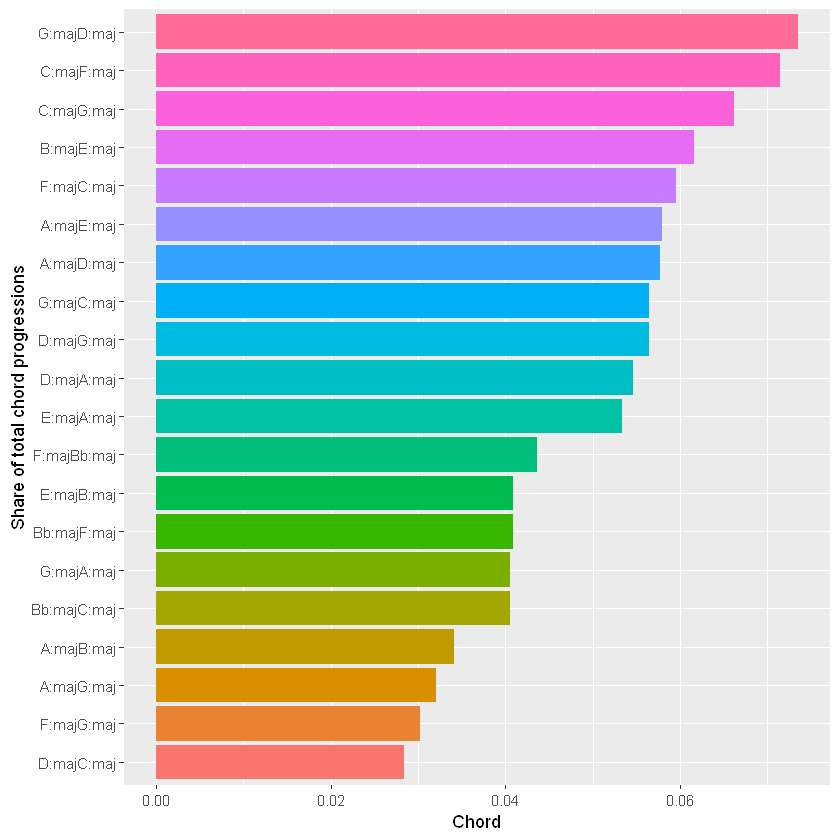

In [47]:
# Creating a column plot from bb_bigram_count
bb_bigram_count %>%
  slice(1:20) %>%
  mutate(share = n/sum(n),
         chord = reorder(bigram,share)) %>%
  ggplot(aes(chord,share,fill=chord)) +
  geom_col() +
  coord_flip() +
  xlab('Share of total chord progressions') +
  ylab('Chord') + 
theme(legend.position="none")

#### Note how the most common chord change, G major to D major, occurs more than twice as often than even some of the other top 20 chord bigrams

## Finding the 30 artists with the most songs in the dataset 
These are the steps : 
* Using bb chord , isolate the artist and title columns using select().
* We still have one record per chord. Use unique() to remove duplicates and leave a single record per song.
* As in earlier tasks, use count() to find how many songs each artist has in the dataset, and sort the results in descending order
* Display the first 30 records in the sorted table.

In [58]:
# Finding 30 artists with the most songs in the corpus
bb_30_artists <- bb_chords %>%
select(c(artist,title)) %>%
unique() %>%
count(artist,sort = TRUE)

# displaying the 30 artists 
bb_30_artists %>%
slice(1:30)

artist,n
Elvis Presley,13
Brenda Lee,9
Dion,8
Bob Seger,7
James Brown,7
Kenny Rogers,7
The Beatles,7
Chicago,6
Dr. Hook,6
Eric Clapton,6


## Tagging the corpus
There are relatively few artists in this list whose music is demonstrably "piano-driven," but we can identify a few that generally emphasize keyboards over guitar: Abba, Billy Joel, Elton John, and Stevie Wonder — totaling 17 songs in the corpus. There are many guitar-centered artists in this list, so for our test, we'll focus on three well known, guitar-heavy artists with a similar number of songs in the corpus: The Rolling Stones, The Beatles, and Eric Clapton (18 songs).

Once we've subset the corpus to only songs by these seven artists and applied the "piano" and "guitar" tags, we can compare the chord content of piano-driven and guitar-driven songs.

* Add a new column instrument to bb, including "piano" or "guitar" for piano- and guitar-driven songs.

* Use inner_join() with tags to attach an instrument column to bb and assign the result to bb_tagged.

* Display the new data frame bb_tagged to make sure the join was successful.

In [117]:
tags <- tibble(
  artist = c('Abba', 'Billy Joel', 'Elton John', 'Stevie Wonder', 'The Rolling Stones', 'The Beatles', 'Eric Clapton'),
  instrument = c('piano', 'piano', 'piano', 'piano', 'guitar', 'guitar', 'guitar'))
# joining the tags dataframe with the bb chords dataframe so that we attach the instrument column

bb_tagged <- bb_chords %>%
inner_join(tags,bb_chords,by="artist")
head(bb_tagged)

year,chord,root_integer,root_roman,quality,title_compressed,artist_compressed,title,artist,instrument
1984,C:maj,0,I,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,D:min,2,II,min,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,F:maj,5,IV,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,G:maj,7,V,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,C:maj,0,I,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,D:min,2,II,min,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano


#### To learn more about the output of joins , let's check the outputs when we change the join from an inner one to a left one + trying out with the full join.

In [65]:
bb_tagged_leftjoin <- bb_chords %>%
left_join(tags,bb_chords,by="artist")
head(bb_tagged_leftjoin,50)

year,chord,root_integer,root_roman,quality,title_compressed,artist_compressed,title,artist,instrument
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA


#### in this case , we only are taking into account the artists that are in the tags dataframe thus ignoring the artists that are in the bb chords dataframe.

In [66]:
bb_tagged_fulljoin <- bb_chords %>%
full_join(tags,bb_chords,by="artist")
head(bb_tagged_fulljoin,50)

year,chord,root_integer,root_roman,quality,title_compressed,artist_compressed,title,artist,instrument
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown,NA


#### with this type of join , we have full rows from both tables with the instrument in case there is , and if not we have NA.
#### to sum up , none of these joins produce the same output as the inner join we have seen above.

## Comparing chords in piano-driven and guitar-driven songs
Let's take a look at any difference in how common chords are in these two song groups. To clean things up, we'll just focus on the 20 chords most common in the dataset.

* Starting with bb_tagged, use filter() to keep only the top_20 chords.
* Use count() to find the number of times each chord occurs for each instrument, and sort the results.
* Pipe the results to ggplot() and make a bar plot, using chord as the X axis and n (the result of count()) as your Y axis.
* Use facet_grid() to place guitar and piano plots side by side for comparison. Then use coord_flip() for readability, and provide appropriate labels for the X and Y axes.

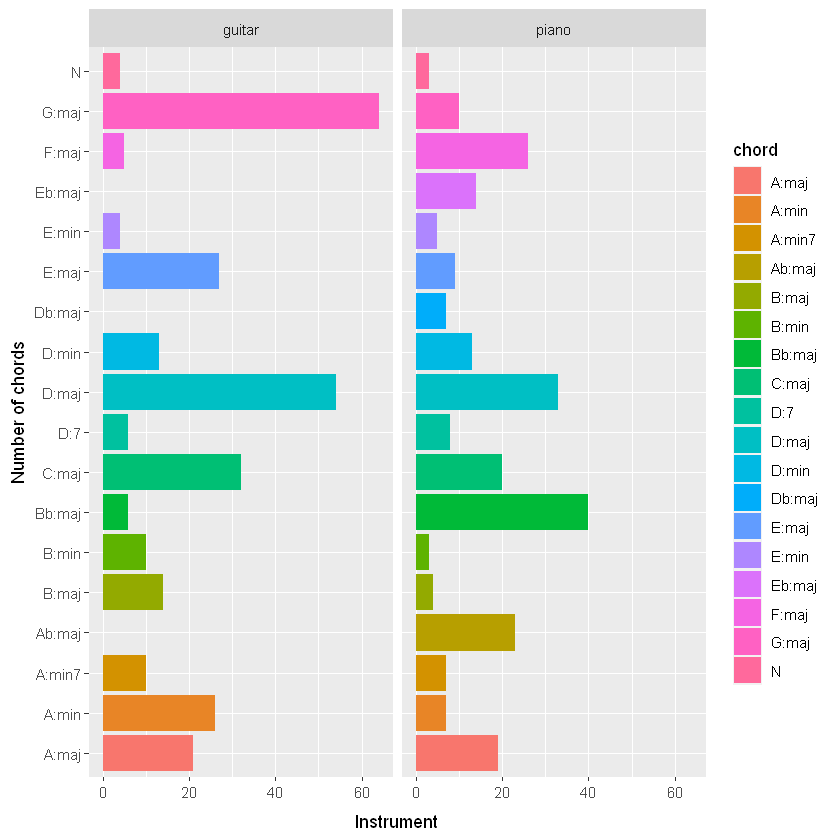

In [77]:
# The top 20 most common chords
top_20 <- bb_count$chord[1:20]

# Comparing the frequency of the 20 most common chords in piano- and guitar-driven songs
bb_tagged %>%
  filter(chord %in% top_20) %>%
  count(chord,instrument,sort=TRUE) %>%
  ggplot(aes(chord,n,fill=chord))+
  geom_col() +
  facet_grid(~instrument) +
  coord_flip () + 
  xlab('Number of chords') +
  ylab('Instrument') 

## Comparing chord bigrams in piano-driven and guitar-driven songs

Since chord occurrence and chord bigram occurrence are naturally strongly tied to each other, it would not be a reach to expect that a difference in chord frequency would be reflected in a difference in chord bigram frequency

In [99]:
# The top 20 most common bigrams
top_20_bigram <- bb_bigram_count$bigram[1:20]

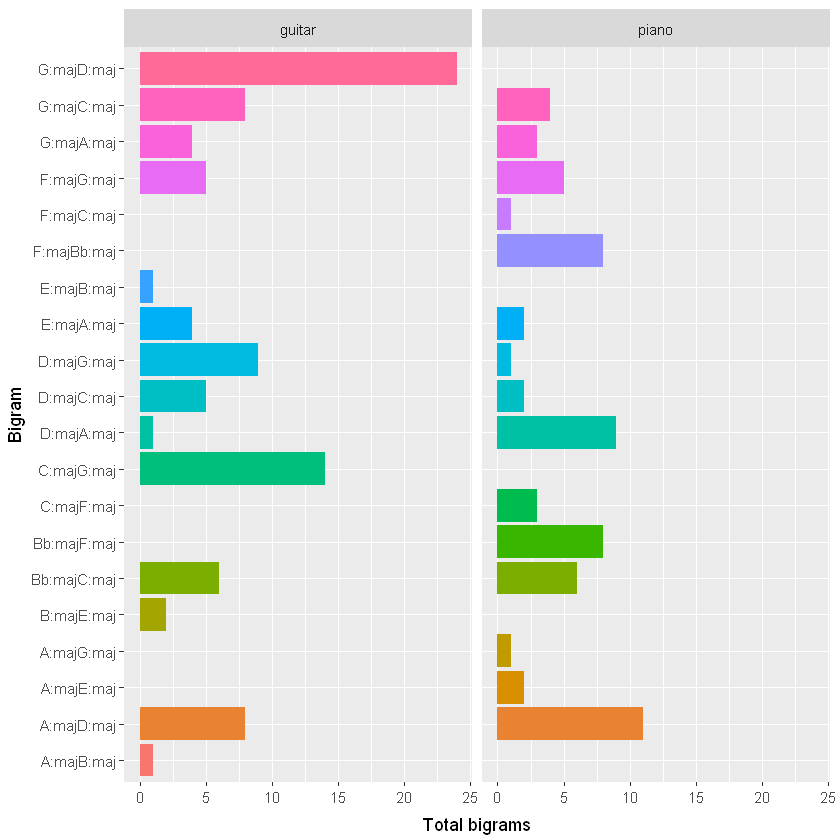

In [114]:
bb_tagged %>%
  mutate(next_chord = lead(chord),
         next_title = lead(title),
         bigram = paste(chord, next_chord,sep="")) %>%
  filter(title == next_title) %>%
  count(bigram, instrument, sort = TRUE) %>%
  filter(bigram %in% top_20_bigram) %>%
  ggplot(aes(bigram, n, fill = bigram)) +
  geom_col() +
  facet_grid(~instrument) +
  coord_flip() +
  ylab('Total bigrams') +
  xlab('Bigram') +
  theme(legend.position="none")

#### As we can see that a difference in chord frequency would be reflected in a difference in chord bigram frequency indeed!!

#### We set out asking if the degree to which a chord is "idiomatic" on an instrument affects how frequently it is used by a songwriter. It seems that is indeed the case. In a large representative sample of pop/rock songs from the historical Billboard charts, the chords most often learned first by guitarists and pianists are the most common. In fact, chords commonly deemed easy or beginner-friendly on both piano and guitar are far and away the most common in the corpus.